In [1]:
# print out each line in the input cell not only the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# expand the cell width to 100% of t 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

# Kleines Projekt 3: Stufen Aufgabe

In [2]:
w0, w1, w2, w3, x = var('w0', 'w1', 'w2', 'w3', 'x')

model(x) = w0 + w1*x + w2*x**2 + w3*x**3

stair_height = 0.2

width = 1.2

points = [(0, 50), (20, 47), (40, 43), (60, 38), (80, 32), (100, 25), (120, 17), (140, 8), (160, 6), (180, 2), (200, 0)]

In [3]:
def plotPoints(points):
    return list_plot(points)

In [4]:
def createFunction(x, y):
    return w0 + w1*x + w2*x**2 + w3*x**3 == y

In [5]:
def getAllFunctions(points):
    functions = []

    for point in points:
        functions.append(createFunction(point[0], point[1]))
    
    return functions

In [6]:
def getExactSolution(points, model):
    return solve(getAllFunctions(points), w0, w1, w2, w3)

In [7]:
def getApproxSolution(points, model):
    return find_fit(points,model,solution_dict=True)

In [8]:
def plotPointsAndFunction(approx, points):
    g = Graphics()

    g = plot(approx[w0] + approx[w1]*x + approx[w2]*x**2 + approx[w3]*x**3, xmax = 200, ymax = 50)

    for element in points:
        g += point(element, color='red', size=30)

    return g

## Aufgabe 2

In [9]:
def defineFunction(approx, x):
    return approx[w0] + approx[w1]*x + approx[w2]*x**2 + approx[w3]*x**3

In [10]:
def getDiffOfFunction(func):
    return diff(func)

In [11]:
def getGradient(func, x):
    return func(x)

In [12]:
def getGradientExact(func):
    return [(round(solve(func == -1/3, x, solution_dict = true)[0][x], 20), round(solve(func == -1/3, x, solution_dict = true)[1][x], 20))]

In [29]:
def paintStairIntervals(intervals, approx):

    g = Graphics()

    g = plot(approx[w0] + approx[w1]*x + approx[w2]*x**2 + approx[w3]*x**3, xmax = 200, ymax = 50)


    for interval in intervals:
        g += plot(approx[w0] + approx[w1]*x + approx[w2]*x**2 + approx[w3]*x**3, color='red', xmin=interval[0], xmax=interval[1])

    return g

In [14]:
## diese wird überflüssig sobald getGradientExact nicht nur noch auf ein Intervall beschränkt ist!
def getAllStairsInterval(func):

    startInterval = None

    intervals = []

    i = 0

    while i <= 200:
        gradient = abs(getGradient(func, i))

        if gradient > 1/3 and startInterval == None:
            startInterval = i

        if gradient < 1/3 and startInterval != None:
            intervals.append((startInterval, i))
            startInterval = None

        i += 0.01

    return intervals

In [15]:
def getAllStairs(intervals, func):

    allStairs = []

    for interval in intervals:

        difference = abs(getGradient(func, interval[0]) - getGradient(func, interval[1]))

        amountOfStairs = difference / stair_height

        averageLength = (interval[1] - interval[0]) / amountOfStairs


        allStairs.append({'start' : interval[0], 'end': interval[1], 'length': averageLength, 'amountOfStairs': amountOfStairs, 'difference': difference})

    return allStairs

## Aufgabe 3

In [16]:
def getLength(func, start, end):
    return integral(sqrt(1 + (func) ** 2), x, start, end)

In [17]:
def getAsphaltLength(func, stairInterval):

    length = getLength(func, 0, 200)

    for interval in stairInterval:

        length -= getLength(func, interval['start'], interval['end'])

    return length

## Aufgabe 4

In [18]:
def costCalculationAsphalt(length):
    return length * width * 20

In [19]:
def costCalculationStairs(intervals):
    costs = 0

    for interval in intervals:
        costs += (interval['end'] - interval['start']) * width * 30

    return costs

## MAIN PROGRAMM

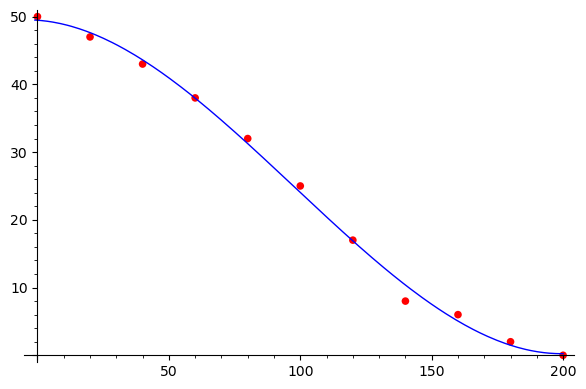

[(68.25873583808355, 127.11316619418382)]

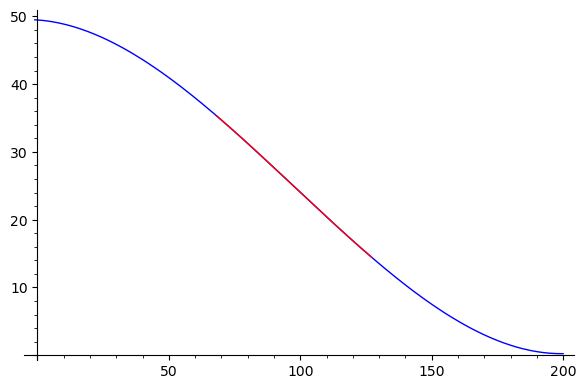

[{'start': 68.25873583808355,
  'end': 127.11316619418382,
  'length': 0.5654715405330049,
  'amountOfStairs': 104.08026954039981,
  'difference': 20.81605390807996}]

144.572199010600

5588.49226907401

In [30]:
approx = getApproxSolution(points, model)

f(x) = defineFunction(approx, x)

f_2(x) = getDiffOfFunction(f)

plotPointsAndFunction(approx, points)


# intervals = getAllStairsInterval(f_2)
intervals = getGradientExact(f_2)
intervals
paintStairIntervals(intervals, approx)

intervals = getAllStairs(intervals, f)
intervals

length = getAsphaltLength(f_2, intervals)
length

costsAsphalt = costCalculationAsphalt(length)
costsStairs = costCalculationStairs(intervals)

combinedCosts = costsAsphalt + costsStairs
combinedCosts

